In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [19]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [92]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# To view the basic info about Tesla stock
print(tesla_ticker.info)
tesla_stock_data = tesla_ticker.history(period="max")
# tesla_stock_data.head()
tesla_stock_data=tesla_stock_data.reset_index()
tesla_stock_data.head()

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [93]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [94]:
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [95]:
html=requests.get(url).text
soup=BeautifulSoup(html,'html.parser')


In [96]:
tesla_tables = soup.find_all('table')
for index,table in enumerate(tesla_tables):
  if ("Tesla Quarterly Revenue" in str(table)):
    tesla_table_index = index
  tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
   col = row.find_all("td")
   if (col !=[]):
     date = col[0].text
     revenue = col[1].text.replace("$", "").replace(",", "")
     new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
     tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [97]:
# read_html_pandas_data = pd.read_html(url)
# read_html_pandas_data

In [98]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the Tesla Quarterly Revenue table
for index, table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

# Ensure the table is found
if 'tesla_table_index' not in locals():
    print("Tesla Quarterly Revenue table not found.")
else:
    for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        if col != []:
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)


In [99]:
import yfinance as yf
GameStop=yf.Ticker("GME")
print(GameStop.info)
GameStop=GameStop.history(period="max")
GameStop.head()
GameStop=GameStop.reset_index()
GameStop.head()


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [129]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. "

In [130]:
# import lxml
# from lxml import html
html_2=requests.get(url).text
soup_2=BeautifulSoup(html_2,"html5lib")

<ipython-input-130-6f91e5c26ab8>:4: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup_2=BeautifulSoup(html_2,"html5lib")


In [149]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch GameStop Revenue Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Fetch the HTML content using requests
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the relevant <tbody> tag that contains the GameStop Revenue data
tbody = soup.find_all("tbody")[1]  # This is the second <tbody>, which holds GameStop revenue data

# Initialize an empty list to hold the revenue data
data = []

# Loop through the rows in the <tbody> and extract the data
for row in tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) > 1:  # Check if the row contains both date and revenue
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")

        # Check if revenue is a valid number before appending it
        if revenue != "" and revenue.replace(".", "", 1).isdigit():  # Validate revenue is a number
            data.append([date, revenue])

# Create a DataFrame for GameStop Revenue
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Convert the 'Date' column to datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Convert 'Revenue' column to numeric, invalid parsing will be coerced to NaN
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


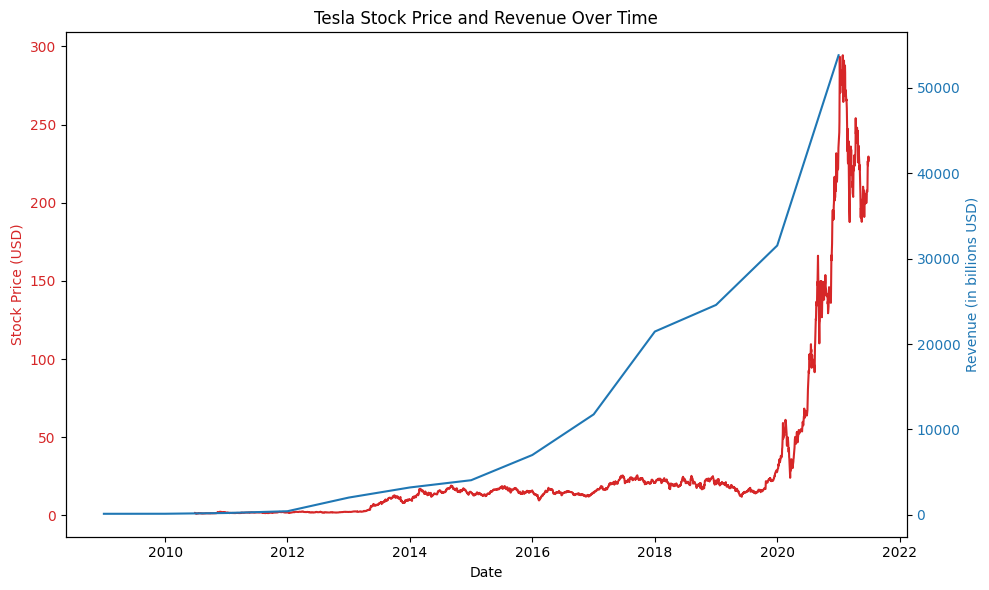

In [144]:
make_graph(tesla_stock_data, tesla_revenue, 'Tesla')

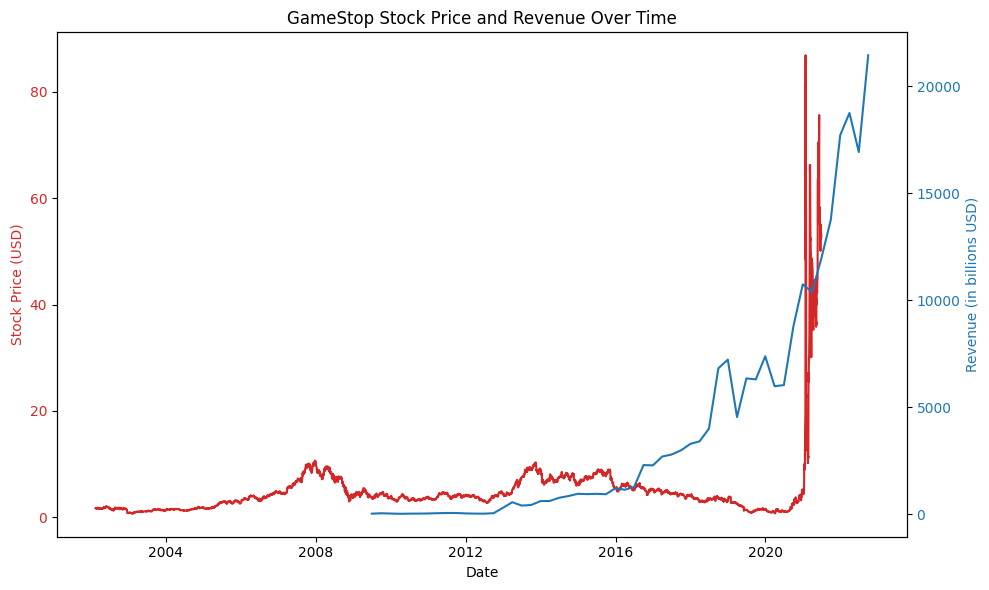

In [150]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


tbody = soup.find_all("tbody")[1]


data = []

for row in tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")


        if revenue != "" and revenue.replace(".", "", 1).isdigit():
            data.append([date, revenue])


gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])


gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


gme_revenue = gme_revenue.dropna()


gme_stock = yf.Ticker('GME')


gme_stock_data = gme_stock.history(period="max", end="2021-06-30")


def make_graph(stock_data, revenue_data, title):

    fig, ax1 = plt.subplots(figsize=(10, 6))


    ax1.plot(stock_data.index, stock_data['Close'], color='tab:red', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')


    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:blue', label='Revenue')
    ax2.set_ylabel('Revenue (in billions USD)', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')


    plt.title(f'{title} Stock Price and Revenue Over Time')


    fig.tight_layout()
    plt.show()
make_graph(gme_stock_data, gme_revenue, 'GameStop')
